In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the necessary packages

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
#from keras.applications.resnet50 import ResNet50
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.layers import *
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from keras.utils import plot_model
from IPython.display import display
from keras import backend as K
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [ ]:
datafolder = "/content/drive/MyDrive/FY_BTech_Project/data"
os.chdir("/content/drive/MyDrive/FY_BTech_Project")

In [ ]:

!ls

'AlexNet & VGGNet'  'DR_ResNet_Binary_Final (1).ipynb'	       ResNet-18
 Amar		    'final_resnet_UC_Merced_Land(86%).ipynb'  'Saved Models'
'CUDA '		    'Final Review 2'			       Signatures
 data		     model.png
 data2		    'Research Paper'


In [ ]:
# Check the number of images in the dataset
data = []
label = []

# os.listdir returns the list of files in the folder, in this case image class names
for i in os.listdir(datafolder):
  train_class = os.listdir(os.path.join('data', i))
  for j in train_class:
    img = os.path.join('data', i, j)
    data.append(img)
    label.append(i)

print('Number of train images : {} \n'.format(len(data)))

Number of train images : 3662 



In [ ]:
data

['data/Moderate/0afdfe5f422c.png',
 'data/Moderate/064af6592ba6.png',
 'data/Moderate/0a1076183736.png',
 'data/Moderate/0af296d2f04a.png',
 'data/Moderate/01c7808d901d.png',
 'data/Moderate/07419eddd6be.png',
 'data/Moderate/07d8db76b301.png',
 'data/Moderate/08c17a2d95b7.png',
 'data/Moderate/00a8624548a9.png',
 'data/Moderate/01eb826f6467.png',
 'data/Moderate/0161338f53cc.png',
 'data/Moderate/033f2b43de6d.png',
 'data/Moderate/0a09aa7356c0.png',
 'data/Moderate/094858f005ab.png',
 'data/Moderate/03ff7d159f10.png',
 'data/Moderate/000c1434d8d7.png',
 'data/Moderate/06024377d573.png',
 'data/Moderate/00b74780d31d.png',
 'data/Moderate/07a3be30563b.png',
 'data/Moderate/0415fc68b176.png',
 'data/Moderate/026dcd9af143.png',
 'data/Moderate/071435a218ec.png',
 'data/Moderate/0a9ec1e99ce4.png',
 'data/Moderate/052d9a3fe55a.png',
 'data/Moderate/041f09eec1e8.png',
 'data/Moderate/09f6ab477654.png',
 'data/Moderate/04d029cfb612.png',
 'data/Moderate/032d7b0b4bf6.png',
 'data/Moderate/03fd

In [ ]:
label

['Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',

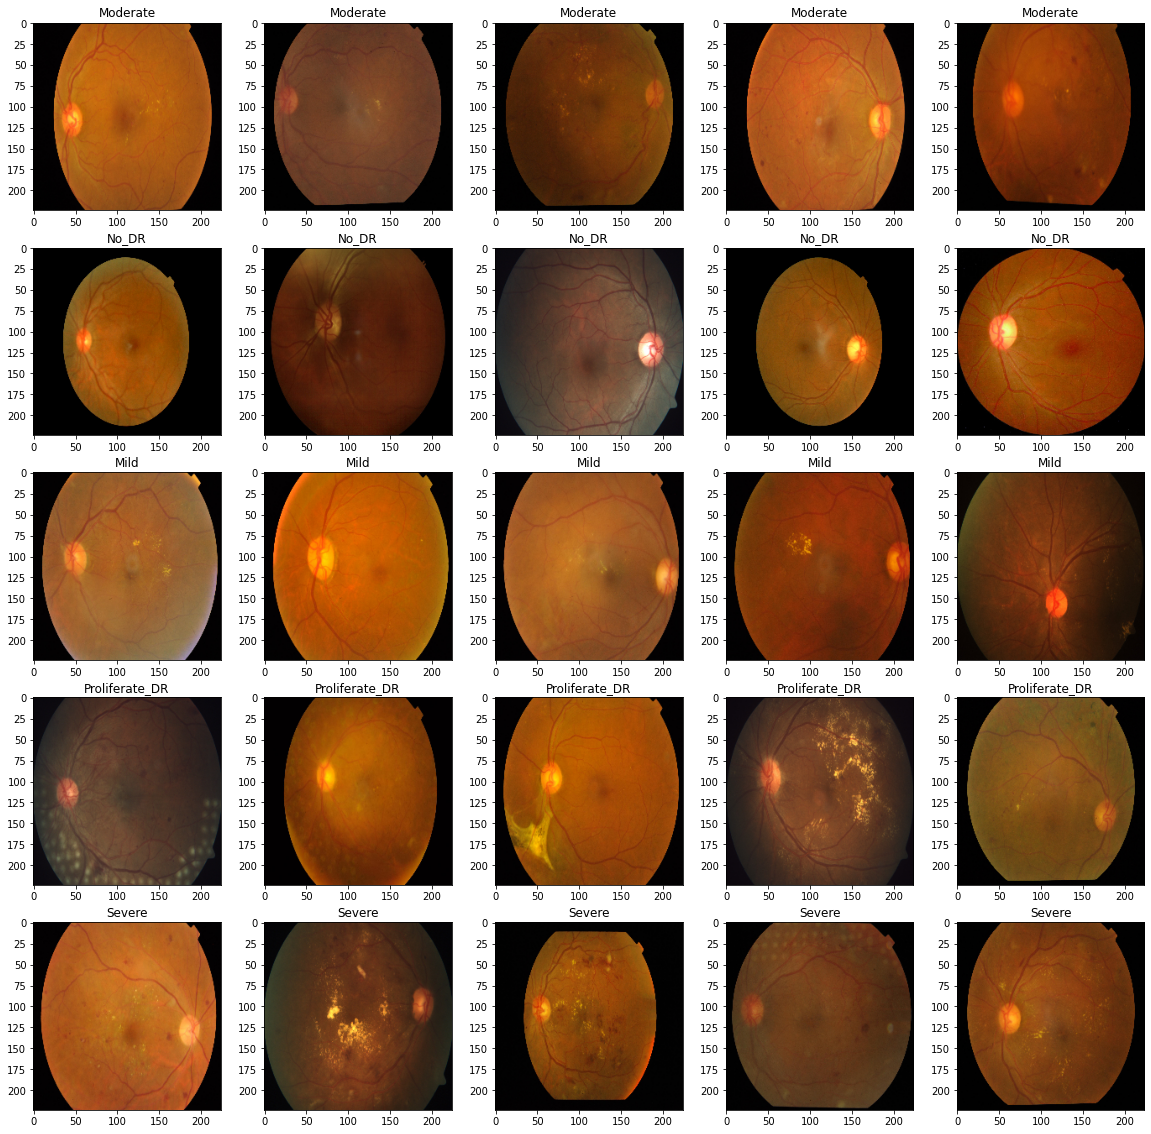

In [ ]:
# Visualize 5 images for each class in the dataset

fig, axs = plt.subplots(5, 5, figsize = (20, 20))
count = 0
for i in os.listdir(datafolder):
  # get the list of images in a given class
  train_class = os.listdir(os.path.join('data', i))
  # plot 5 images per class
  for j in range(5):
    img = os.path.join('data', i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1



In [ ]:
No_images_per_class = []
Class_name = []
total = 0;
for i in os.listdir(datafolder):
  train_class = os.listdir(os.path.join('data', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} = {} \n'.format(i, len(train_class)))
  total+=len(train_class)  
print("\n\tNumber of total images = {}".format(total))

Number of images in Moderate = 999 

Number of images in No_DR = 1805 

Number of images in Mild = 370 

Number of images in Proliferate_DR = 295 

Number of images in Severe = 193 


	Number of total images = 3662


In [ ]:
df = pd.DataFrame({'data': data,'Labels': label})
df

data    Labels
0     data/Moderate/0afdfe5f422c.png  Moderate
1     data/Moderate/064af6592ba6.png  Moderate
2     data/Moderate/0a1076183736.png  Moderate
3     data/Moderate/0af296d2f04a.png  Moderate
4     data/Moderate/01c7808d901d.png  Moderate
...                              ...       ...
3657    data/Severe/762d6e5d5068.png    Severe
3658    data/Severe/c67117c6ab3b.png    Severe
3659    data/Severe/f5a8c6426a71.png    Severe
3660    data/Severe/916ec976ff30.png    Severe
3661    data/Severe/e32a359be36d.png    Severe

[3662 rows x 2 columns]

In [ ]:
df = shuffle(df)
train, test = train_test_split(df, test_size = 0.10,random_state=42,shuffle=True)

In [ ]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split = 0.10)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Creating datagenerator for training, validation and test dataset.

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="data",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='./',
    x_col="data",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='./',
    x_col="data",
    y_col="Labels",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 2966 validated image filenames belonging to 5 classes.
Found 329 validated image filenames belonging to 5 classes.
Found 367 validated image filenames belonging to 5 classes.


In [ ]:
def alex_net():
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=(256,256,3), kernel_size=(3,3), strides=(2,2), padding='valid', activation="relu"))
    # Pooling 
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation before passing it to the next layer
    model.add(BatchNormalization())

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', activation="relu"))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation="relu"))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation="relu"))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), padding='valid', activation="relu"))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Passing it to a dense layer
    model.add(Flatten())
    # 1st Dense Layer
    model.add(Dense(5, input_shape=(512*512*3,), activation="relu"))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.3))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 2nd Dense Layer
    model.add(Dense(5, activation="relu"))
    # Add Dropout
    model.add(Dropout(0.3))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 3rd Dense Layer
    model.add(Dense(5, activation="relu"))
    # Add Dropout
    model.add(Dropout(0.3))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Output Layer with 8 probability classes
    model.add(Dense(5, activation="softmax"))
    return model

In [ ]:
model = alex_net()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 127, 127, 96)      2688      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 63, 63, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_24 (Bat  (None, 63, 63, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 256)       221440    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 256)      0         
 g2D)                                                            
                                                      

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='accuracy', mode='auto', verbose=1, patience=30)

#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="/content/drive/MyDrive/FY_BTech_Project/AlexNet & VGGNet/Final_AlexNet_saved_model_check.h5", verbose = 1, save_best_only=True)

In [ ]:
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 50, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])

Epoch 1/50
92/92 [==============================] - ETA: 0s - loss: 1.7156 - accuracy: 0.2941
Epoch 1: val_loss improved from inf to 1.43110, saving model to /content/drive/MyDrive/FY_BTech_Project/AlexNet & VGGNet/Final_AlexNet_saved_model_check.h5
92/92 [==============================] - 58s 614ms/step - loss: 1.7156 - accuracy: 0.2941 - val_loss: 1.4311 - val_accuracy: 0.4750
Epoch 2/50
92/92 [==============================] - ETA: 0s - loss: 1.4160 - accuracy: 0.4342
Epoch 2: val_loss did not improve from 1.43110
92/92 [==============================] - 57s 615ms/step - loss: 1.4160 - accuracy: 0.4342 - val_loss: 1.5534 - val_accuracy: 0.2812
Epoch 3/50
92/92 [==============================] - ETA: 0s - loss: 1.3008 - accuracy: 0.4928
Epoch 3: val_loss did not improve from 1.43110
92/92 [==============================] - 55s 595ms/step - loss: 1.3008 - accuracy: 0.4928 - val_loss: 1.5225 - val_accuracy: 0.2844
Epoch 4/50
92/92 [==============================] - ETA: 0s - loss: 1.22

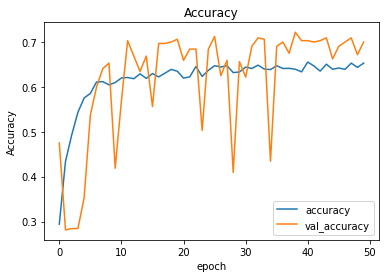

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy'], loc = 'lower right')
plt.show()

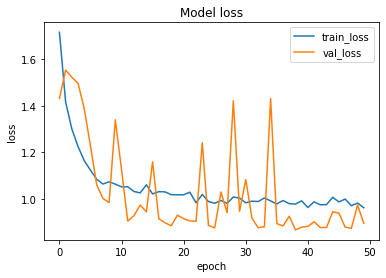

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [ ]:
# Evaluate the performance of the model
from keras.models import load_model
saved_model = load_model("/content/drive/MyDrive/FY_BTech_Project/AlexNet & VGGNet/Final_AlexNet_saved_model_check.h5")
evaluate = saved_model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)
evaluate2 = saved_model.evaluate(validation_generator, steps = validation_generator.n // 32, verbose =1)
print('Accuracy Test : {}'.format(evaluate[1]))
print('Loss Test : {}'.format(evaluate[0]))
#print('Accuracy validation : {:.4f} %'.format(evaluate2[1]*100))
#print('Loss validation : {:.4f}'.format(evaluate2[0]))

10/10 [==============================] - 5s 505ms/step - loss: 0.8847 - accuracy: 0.7063
Accuracy Test : 0.71875
Loss Test : 0.8913145661354065


In [ ]:
# Assigning label names to the corresponding indexes
labels = {0: 'Mild', 1: 'Moderate', 2: 'No_DR', 3:'Proliferate_DR', 4: 'Severe'}

In [ ]:
# Loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  # code to open the image
  img= PIL.Image.open(test['data'].tolist()[item])
  # resizing the image to (256,256)
  img = img.resize((256,256))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
  # normalizing the image
  img = img / 255
  # reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  # making prediction of the model
  predict = saved_model.predict(img)
  # getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  # appending the predicted class to the list
  prediction.append(labels[predict])
  # appending original class to the list
  original.append(test['Labels'].tolist()[item])

1/1 [==============================] - 0s 18ms/step


In [ ]:
# Getting the test accuracy 
score = accuracy_score(original, prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.7247956403269755


In [ ]:
'''from keras.engine.data_adapter import train_validation_split
# Loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(validation_generator)):
  # code to open the image
  img= PIL.Image.open(train['Image'].tolist()[item])
  # resizing the image to (256,256)
  img = img.resize((256,256))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
  # normalizing the image
  img = img / 255
  # reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  # making prediction of the model
  predict = saved_model.predict(img)
  # getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  # appending the predicted class to the list
  prediction.append(labels[predict])
  # appending original class to the list
  original.append(test['Labels'].tolist()[item])'''

"from keras.engine.data_adapter import train_validation_split\n# Loading images and their predictions \n\nfrom sklearn.metrics import confusion_matrix, classification_report, accuracy_score\n# import cv2\n\nprediction = []\noriginal = []\nimage = []\ncount = 0\n\nfor item in range(len(validation_generator)):\n  # code to open the image\n  img= PIL.Image.open(train['Image'].tolist()[item])\n  # resizing the image to (256,256)\n  img = img.resize((256,256))\n  # appending image to the image list\n  image.append(img)\n  # converting image to array\n  img = np.asarray(img, dtype= np.float32)\n  # normalizing the image\n  img = img / 255\n  # reshaping the image in to a 4D array\n  img = img.reshape(-1,256,256,3)\n  # making prediction of the model\n  predict = saved_model.predict(img)\n  # getting the index corresponding to the highest value in the prediction\n  predict = np.argmax(predict)\n  # appending the predicted class to the list\n  prediction.append(labels[predict])\n  # appending 

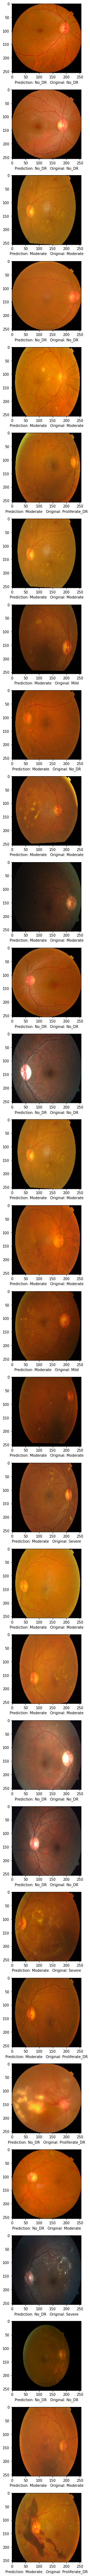

In [ ]:
# Visualizing the results
import random
fig=plt.figure(figsize = (100,100))
for i in range(30):
    j = random.randint(0,len(image))
    fig.add_subplot(30, 1, i+1)
    plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve,auc
print(classification_report(np.asarray(original), np.asarray(prediction)))

                precision    recall  f1-score   support

          Mild       0.00      0.00      0.00        36
      Moderate       0.52      0.91      0.66        99
         No_DR       0.91      0.97      0.94       182
Proliferate_DR       0.00      0.00      0.00        33
        Severe       0.00      0.00      0.00        17

      accuracy                           0.72       367
     macro avg       0.29      0.38      0.32       367
  weighted avg       0.59      0.72      0.64       367



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

def get_accuracies(true_labels, predictions):
    cm = multilabel_confusion_matrix(true_labels, predictions)
    total_count = len(test)
    accuracies = []
    for i in range(5):
        true_positive_count = np.sum(cm[i,1,1]).item()
        true_negative_count = np.sum(cm[i,0,0]).item()
        accuracy = (true_positive_count + true_negative_count) / total_count
        accuracies.append(accuracy)
    return accuracies
list4=[]
list4= get_accuracies(original, prediction)
a=[]
b=[]
for i in labels:
  a.append(labels[i])
  b.append(list4[i])
c = pd.DataFrame({'Labels': a, 'Accuracy': b})
c

Labels  Accuracy
0            Mild  0.901907
1        Moderate  0.749319
2           No_DR  0.934605
3  Proliferate_DR  0.910082
4          Severe  0.953678

Text(0.5, 1.0, 'Confusion_matrix')

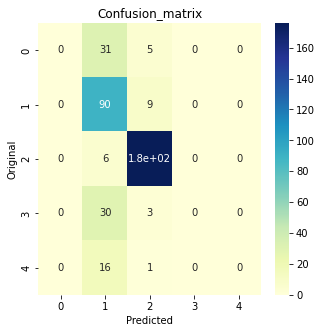

In [ ]:
import seaborn as sns
plt.figure(figsize = (5,5))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, cmap="YlGnBu")

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
sensitivity = (TP/(TP + FN))
specificity = (TN/(TN + FP))

print("Sensitivity : "+str(sensitivity))
print("Specificity : "+str(specificity))

Sensitivity : [0.         0.90909091 0.96703297 0.         0.        ]
Specificity : [1.         0.69029851 0.9027027  1.         1.        ]


In [ ]:
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
def multiclass_roc_auc_score(list1, list2, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(list1)
  list1 = lb.transform(list1)
  list2 = lb.transform(list2)
  return roc_auc_score(list1, list2, average=average)

In [ ]:
print("AUC score: ",multiclass_roc_auc_score(original,prediction))

AUC score:  0.6469125086289266


In [ ]:
from sklearn import metrics
a = metrics.classification_report(np.asarray(original), np.asarray(prediction), output_dict=True)
df_classification_report = pd.DataFrame(a).transpose()
necessary = df_classification_report[0:7]
necessary = necessary.sort_values(by=['f1-score'], ascending=False)
print(necessary)
mAP = sum(necessary['precision'])/7
print("mAP: ",mAP)

                precision    recall  f1-score     support
No_DR            0.907216  0.967033  0.936170  182.000000
accuracy         0.724796  0.724796  0.724796    0.724796
Moderate         0.520231  0.909091  0.661765   99.000000
macro avg        0.285490  0.375225  0.319587  367.000000
Mild             0.000000  0.000000  0.000000   36.000000
Proliferate_DR   0.000000  0.000000  0.000000   33.000000
Severe           0.000000  0.000000  0.000000   17.000000
mAP:  0.3482475558269725


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(original,prediction)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.549359


In [ ]:
list1=[]
list2=[]
lb = preprocessing.LabelBinarizer()
lb.fit(original)
lb.fit(prediction)

list1 =lb.transform(original)
list2 =lb.transform(prediction)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

n_classes = 5

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(list1[:, i],list2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(list1.ravel(), list2.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(figsize=(10,10))
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

IndexError: ignored